<a href="https://colab.research.google.com/github/fahmizainal17/Car_Price_Prediction_Model/blob/main/Prediction_Model_of_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries and Packages

Import all basic libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Carsome_Project/DS Case Study_ Car Sales Data.xlsx')

#2. Data Preparation

Import the data


In [4]:
df.head()

,car_brand,car_model,car_variant,car_year,car_engine,car_transmission,milage,accident,flood,color,purchase_date,sales_date,price
0,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,b20b25f3d8e86acc926ec233aac7485058f71a82cbb6f8...,2010,2.0,Auto,282508,1,0,blue,22/08/20,2020-02-10 00:00:00,30100
1,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,Auto,169475,1,0,black,2020-04-09 00:00:00,2020-09-12 00:00:00,32100
2,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,Auto,105276,0,0,white,17/05/20,25/08/20,34100
3,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,bc8c75c6d926e32a4dd2119e279211bae53ad4024822c4...,2010,2.0,Auto,81123,0,0,black,16/01/20,2020-08-05 00:00:00,40100
4,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2013,1.8,Auto,157239,1,0,brown,20/10/20,2020-07-12 00:00:00,42000


### Brief Explanation of Columns

| Header           | Description                                                                                            |
|------------------|--------------------------------------------------------------------------------------------------------|
| car_brand        | Hashed value for a car brand (e.g., Honda, BMW, Proton, etc.)                                          |
| car_model        | Hashed value for a car model (e.g., Myvi, Saga, i3, etc.)                                              |
| car_variant      | Hashed value for a car variant. Car variants can be repeated with different car brands and models. For example, Perodua Myvi & Honda City can both have variant G |
| car_year         | Car production year as a 4-digit integer (e.g., 2010, 2013)                                            |
| car_engine       | Car engine capacity (e.g., 1.8, 2.0)                                                                   |
| car_transmission | Car transmission type (e.g., Auto, Manual)                                                             |
| milage           | Car mileage when it was sold (e.g., 282508, 169475)                                                    |
| accident         | Boolean flag to indicate if a car has been through an accident (0 = No accident, 1 = Accident)         |
| flood            | Boolean flag to indicate if a car has been through a flood (0 = No flood damage, 1 = Flood damage)     |
| color            | Color of the car being sold (e.g., blue, black, white)                                                 |
| purchase_date    | Date when the car was purchased (in DD/MM/YY format)                                                   |
| sales_date       | Date when the car was sold (in DD/MM/YY format)                                                        |
| price            | Price at which the car was sold (e.g., 30100, 32100)                                                   |


#3. Exploratory Data Analysis

Check descriptive statistics

In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_brand,95426,31,d37b8da02160dc847057988f20d49b8140f0b08a0e7a9d...,21606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_model,95424,219,528d74b0fd396b7d0f9869d2d5dc642662abc6aea4b8a8...,10187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_variant,95426,2279,3f79bb7b435b05321651daefd374cdc681dc06faa65e37...,5285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_year,95426.0,NaN,NaN,NaN,2011.374154,4.256181,1981.0,2009.0,2012.0,2014.0,2020.0
car_engine,95426.0,NaN,NaN,NaN,1.66021,0.428968,0.6,1.4,1.6,2.0,8.0
car_transmission,95426,2,Auto,84885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
milage,95426.0,NaN,NaN,NaN,147804.267128,85450.084755,1.0,88359.5,133479.0,191572.75,992910.0
accident,95426.0,NaN,NaN,NaN,0.396475,0.489168,0.0,0.0,0.0,1.0,1.0
flood,95426.0,NaN,NaN,NaN,0.001027,0.03203,0.0,0.0,0.0,0.0,1.0
color,95426,16,white,23293,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95426 entries, 0 to 95425
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         95426 non-null  object 
 1   car_model         95424 non-null  object 
 2   car_variant       95426 non-null  object 
 3   car_year          95426 non-null  int64  
 4   car_engine        95426 non-null  float64
 5   car_transmission  95426 non-null  object 
 6   milage            95426 non-null  int64  
 7   accident          95426 non-null  int64  
 8   flood             95426 non-null  int64  
 9   color             95426 non-null  object 
 10  purchase_date     95426 non-null  object 
 11  sales_date        95426 non-null  object 
 12  price             95426 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 9.5+ MB


In [7]:
# Convert columns to appropriate data types
df['car_brand'] = df['car_brand'].astype('object')
df['car_model'] = df['car_model'].astype('object')
df['car_variant'] = df['car_variant'].astype('object')
df['car_year'] = df['car_year'].astype('int64')
df['car_engine'] = df['car_engine'].astype('float64')
df['car_transmission'] = df['car_transmission'].astype('object')
df['milage'] = df['milage'].astype('int64')
df['accident'] = df['accident'].astype('int64')
df['flood'] = df['flood'].astype('int64')
df['color'] = df['color'].astype('object')
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)
df['sales_date'] = pd.to_datetime(df['sales_date'])
df['price'] = df['price'].astype('int64')

# Verify the data types
print(df.dtypes)

car_brand                   object
car_model                   object
car_variant                 object
car_year                     int64
car_engine                 float64
car_transmission            object
milage                       int64
accident                     int64
flood                        int64
color                       object
purchase_date       datetime64[ns]
sales_date          datetime64[ns]
price                        int64
dtype: object


## 3.1 Data Cleaning

check missing values


In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing = (missing_values / len(df)) * 100
missing_info = pd.concat([missing_values, percentage_missing], axis=1)
missing_info.columns = ['Missing Values', 'Percentage Missing']

# Format percentage_missing column with two decimal places and percentage symbol
missing_info['Percentage Missing'] = missing_info['Percentage Missing'].apply(lambda x: "{:.2f}%".format(x))

print(missing_info)


                  Missing Values Percentage Missing
car_model                      2              0.00%
car_brand                      0              0.00%
car_variant                    0              0.00%
car_year                       0              0.00%
car_engine                     0              0.00%
car_transmission               0              0.00%
milage                         0              0.00%
accident                       0              0.00%
flood                          0              0.00%
color                          0              0.00%
purchase_date                  0              0.00%
sales_date                     0              0.00%
price                          0              0.00%


As we can see, most of our columns contain misssing values


**Approach to Missing Values**

FootNote
- mean
- median
- mode
- Previous row
- Fully Drop
---
Ways
- mean
- median
- mode
- Fully Drop

In [9]:
# Handling missing values for 'car_model'
df['car_model'].fillna(df['car_model'].mode()[0], inplace=True)

In [10]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing = (missing_values / len(df)) * 100
missing_info = pd.concat([missing_values, percentage_missing], axis=1)
missing_info.columns = ['Missing Values', 'Percentage Missing']

# Format percentage_missing column with two decimal places and percentage symbol
missing_info['Percentage Missing'] = missing_info['Percentage Missing'].apply(lambda x: "{:.2f}%".format(x))

print(missing_info)

                  Missing Values Percentage Missing
car_brand                      0              0.00%
car_model                      0              0.00%
car_variant                    0              0.00%
car_year                       0              0.00%
car_engine                     0              0.00%
car_transmission               0              0.00%
milage                         0              0.00%
accident                       0              0.00%
flood                          0              0.00%
color                          0              0.00%
purchase_date                  0              0.00%
sales_date                     0              0.00%
price                          0              0.00%


Footnote

KDEplot, Histogram
- All Features
- Do not include target

**Check distribution of numerical features**



In [11]:
df.columns

Index(['car_brand', 'car_model', 'car_variant', 'car_year', 'car_engine',
       'car_transmission', 'milage', 'accident', 'flood', 'color',
       'purchase_date', 'sales_date', 'price'],
      dtype='object')

In [12]:
num = df.select_dtypes(include=['int64', 'float64']).columns  # numerical columns
cat = df.select_dtypes(include=['object']).columns  # non-numerical (categorical) columns


In [13]:
num

Index(['car_year', 'car_engine', 'milage', 'accident', 'flood', 'price'], dtype='object')

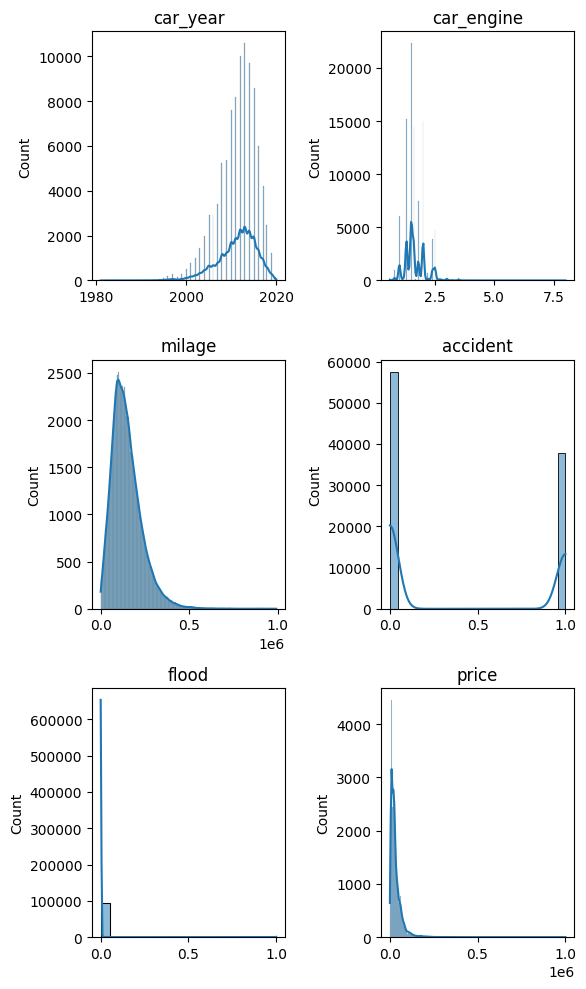

In [14]:
# Define the number of columns for subplots
num_columns = 2
num_rows = int(np.ceil(len(num) / num_columns))

# Create a figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(6, 10))

# Flatten the 2D axes array to simplify indexing
axes = axes.ravel()

# Loop through the features and create histograms
for i, feature in enumerate(num):
    ax = axes[i]
    sns.histplot(data=df, x=feature, ax=ax, kde=True)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')

# Remove any empty subplots
for i in range(len(num), num_rows * num_columns):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

**Check distribution of Categorical features**

In [15]:
cat

Index(['car_brand', 'car_model', 'car_variant', 'car_transmission', 'color'], dtype='object')

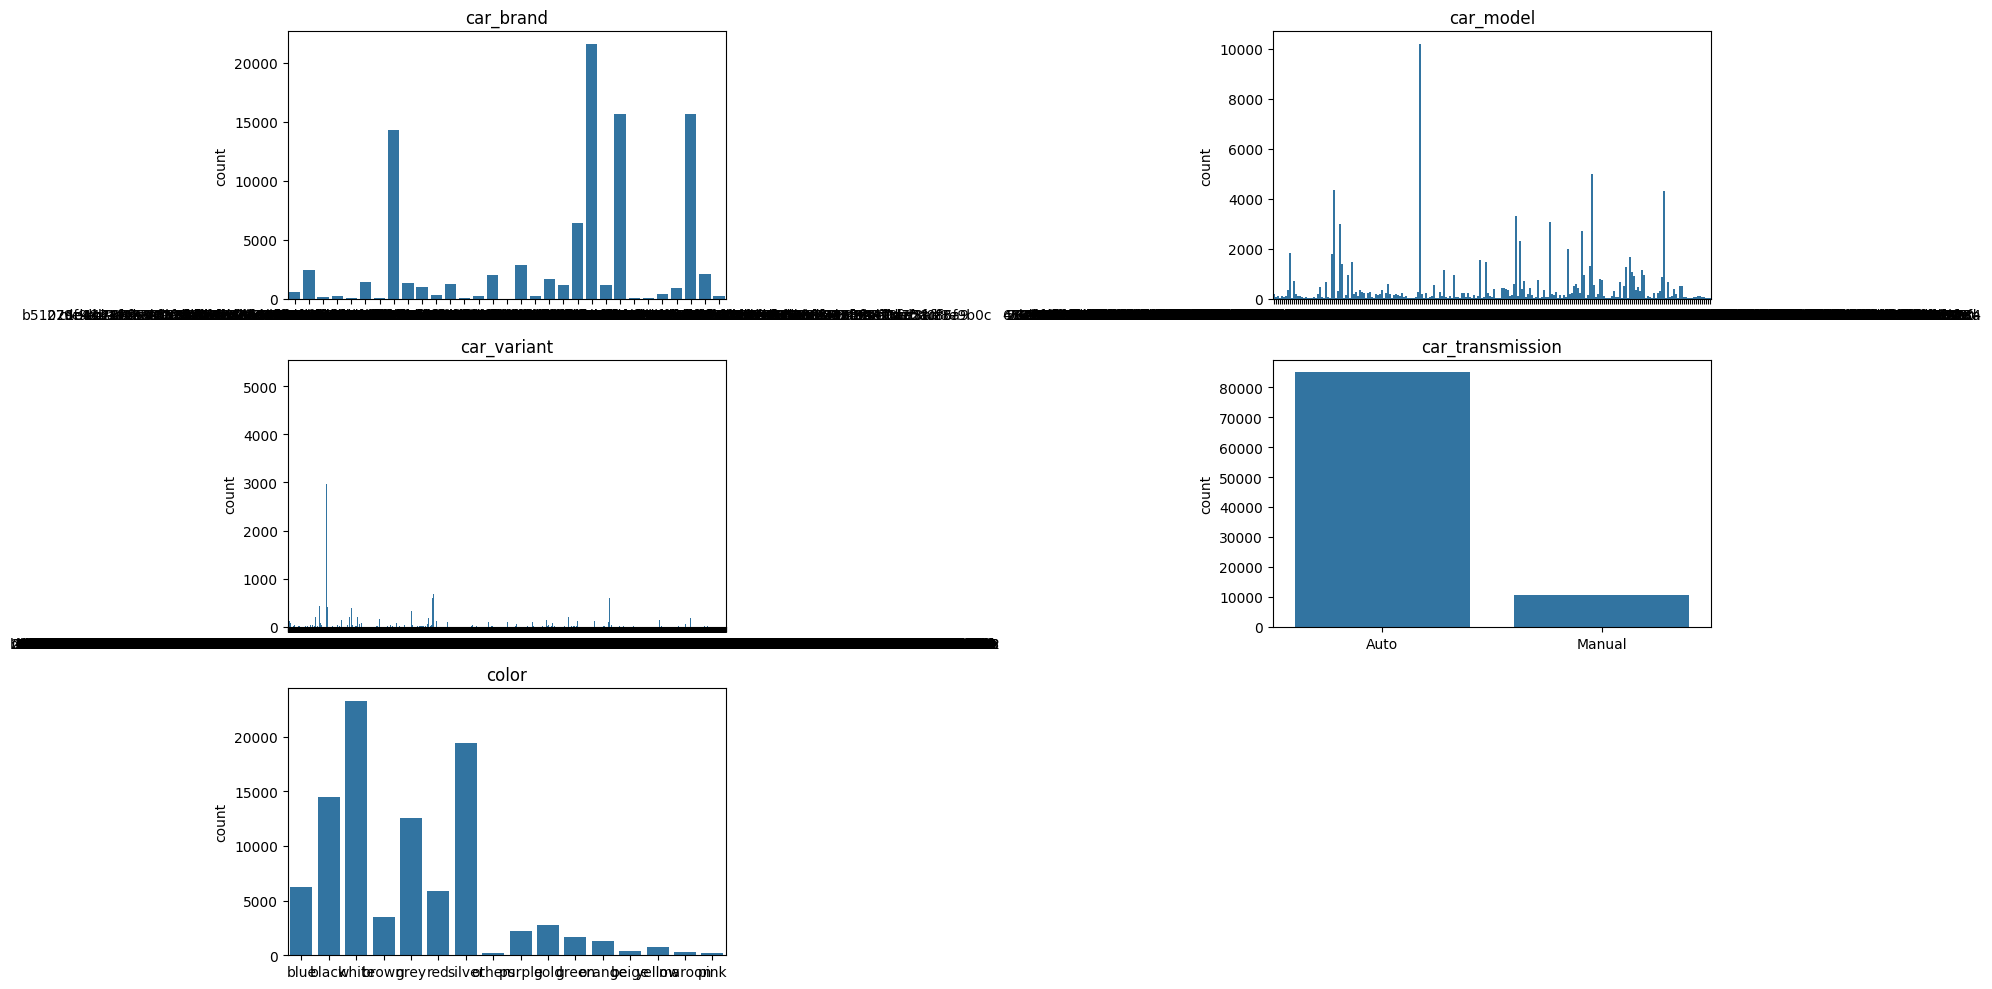

In [16]:
# Define the number of columns for subplots
num_columns = 2
num_rows = int(np.ceil(len(cat) / num_columns))

# Create a figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 10))

# Flatten the 2D axes array to simplify indexing
axes = axes.ravel()

# Loop through the features and create histograms
for i, feature in enumerate(cat):
    ax = axes[i]
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')

# Remove any empty subplots
for i in range(len(cat), num_rows * num_columns):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

Approach for missing values imputation

Everything is fine because we got 0.00% for our missing value
Create Backup Data for impute note in case we want to go back later for correction.

In [17]:
#create a backup first before running the code to retrieve back later the original one
df_backup = df.copy()


In [18]:
df = df_backup.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95426 entries, 0 to 95425
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   car_brand         95426 non-null  object        
 1   car_model         95426 non-null  object        
 2   car_variant       95426 non-null  object        
 3   car_year          95426 non-null  int64         
 4   car_engine        95426 non-null  float64       
 5   car_transmission  95426 non-null  object        
 6   milage            95426 non-null  int64         
 7   accident          95426 non-null  int64         
 8   flood             95426 non-null  int64         
 9   color             95426 non-null  object        
 10  purchase_date     95426 non-null  datetime64[ns]
 11  sales_date        95426 non-null  datetime64[ns]
 12  price             95426 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 9.5+ MB


###Check Duplicates


In [20]:
df[df.duplicated()].count()

,0
car_brand,0
car_model,0
car_variant,0
car_year,0
car_engine,0
car_transmission,0
milage,0
accident,0
flood,0
color,0


###Check Inconsistencies

check logic or not whether per say age 1000 years old ,not happen here (check min and max)

In [21]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
car_year,95426.0,2011.374154,1981.0,2009.0,2012.0,2014.0,2020.0,4.256181
car_engine,95426.0,1.66021,0.6,1.4,1.6,2.0,8.0,0.428968
milage,95426.0,147804.267128,1.0,88359.5,133479.0,191572.75,992910.0,85450.084755
accident,95426.0,0.396475,0.0,0.0,0.0,1.0,1.0,0.489168
flood,95426.0,0.001027,0.0,0.0,0.0,0.0,1.0,0.03203
purchase_date,95426,2020-04-07 00:00:10.864963072,2019-01-04 00:00:00,2019-11-20 00:00:00,2020-05-18 00:00:00,2020-09-04 00:00:00,2021-12-01 00:00:00,NaN
sales_date,95426,2020-06-16 15:42:30.323811072,2019-01-07 00:00:00,2020-01-28 00:00:00,2020-07-23 00:00:00,2020-11-09 00:00:00,2021-12-01 00:00:00,NaN
price,95426.0,32200.764991,400.0,12600.0,23700.0,41500.0,1000800.0,29758.710619


It seems that our data all has consistent values

Now ,our dataset already cleaned

##3.2 Data Formatting

In [22]:
df.head()

,car_brand,car_model,car_variant,car_year,car_engine,car_transmission,milage,accident,flood,color,purchase_date,sales_date,price
0,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,b20b25f3d8e86acc926ec233aac7485058f71a82cbb6f8...,2010,2.0,Auto,282508,1,0,blue,2020-08-22,2020-02-10,30100
1,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,Auto,169475,1,0,black,2020-04-09,2020-09-12,32100
2,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,Auto,105276,0,0,white,2020-05-17,2020-08-25,34100
3,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,bc8c75c6d926e32a4dd2119e279211bae53ad4024822c4...,2010,2.0,Auto,81123,0,0,black,2020-01-16,2020-08-05,40100
4,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2013,1.8,Auto,157239,1,0,brown,2020-10-20,2020-07-12,42000


In [23]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'car_brand': ['b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b37ce3d00010b09af252'
 '27df9ed9a477af0fcfe369c8ef3474a75cebf357d8b421ca40f1de6cfd4cbb06'
 'c1ddb780f9790c61ff6e942d11bf621fce0863216f84349a02a2f46f46485e74'
 '9e48bad6e31c128258257bd997eacca666f0dae2049027b545ea48a0cf43ed71'
 '1c319d594acddfd6e07e776239d8af8082c7ec3dd11056e4ffce37991b2f9407'
 'b2808c947ea04c193e096f4923d13599ab96317dee1e33c8705bfc863f354903'
 '6cded022ad7f4edd300d4732b59399f4edb0c5e15acb742aff8d4ea3caf9a122'
 '8417659f46b5b43b2bb9396f794ab19728546f699babdb914d97bc5adcb9f528'
 'ac85892205b92e8cecdc87185a3fbf039f04b2a7751ccf0e8a1f547d53b9945a'
 '40373db8f9dd27a31e534eb53135622560bed2333475b732d8f9071602c3a3dd'
 '09b7b4bebb61f3282b34b1cffff852224f4ad30bb38f97d1d187da953a2e5a5e'
 '37268bb0020007468bbc5a78ee13a6539b0a0a79bbfcdd7ad08406e8d43cd55f'
 'eede37dac5fe7db56e9354f4113355ebb0c1bb390cf0efa913248cac7a609500'
 '36b53ead480d41766c568fea0d36d5f9a747789300ac0c8d1a9be07ee02ee6a8'
 '9a046660a

### Features to be Formatted

To improve the model's performance and make the data easier for the machine to process, we need to format certain features. The following categorical features will be transformed:

- `car_brand`
- `car_model`
- `car_variant`
- `car_transmission`
- `color`

### Categorical Feature Transformation

#### Encoding Approaches:
1. **One-Hot Encoding**:
   - **Use Case**: Apply when there is no inherent ranking between categories. This will create separate binary columns for each category.
   - **Examples**: `car_brand`, `car_model`, `car_variant`, `color`

2. **Label Encoding**:
   - **Use Case**: Apply when there is a ranking or order between the categories.
   - **Examples**: This approach is not typically used for the features in our dataset, as all categorical features do not have a natural ranking.

### Footnote
- **Dictionary**: A data structure to map categorical values to numerical representations.
- **List**: A sequence of categorical values that need to be encoded.

### Example Encoding:
For one-hot encoding, each unique value in the categorical features will be transformed into a new binary column. For instance:

- `car_transmission`: This will create two binary columns: `car_transmission_Auto` and `car_transmission_Manual`.
- `color`: Will result in binary columns for each color, such as `color_Blue`, `color_Black`, `color_White`, etc.

The encoding process helps convert categorical data into a format suitable for machine learning models.

In [24]:
# # List of categorical features to encode using One-Hot Encoding
# categorical_features = ['car_model', 'car_variant', 'car_transmission', 'color']

# # Apply One-Hot Encoding with numerical 1/0 instead of True/False
# df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

# # Get the list of one-hot encoded columns
# one_hot_encoded_cols = [col for col in df_encoded.columns if col.startswith('car_transmission_') or col.startswith('color_')]

# # Since 'car_brand' was removed, we won't place it after one-hot encoded columns
# columns_order = (
#     [col for col in df_encoded.columns if col not in one_hot_encoded_cols] +
#     one_hot_encoded_cols
# )

# # Reorder the DataFrame
# df_encoded = df_encoded[columns_order]

# # Verify the transformation
# print(df_encoded.head())

# # Check for any missing values before proceeding with model training
# missing_values = df_encoded.isnull().sum()
# print(f'Missing values:\n{missing_values[missing_values > 0]}')


In [25]:
# # Count the number of rows before dropping missing values
# count_before_dropna = df_encoded.shape[0]

# # Drop rows with missing values
# df_cleaned = df_encoded.dropna()

# # Count the number of rows after dropping missing values
# count_after_dropna = df_cleaned.shape[0]

# # Print the counts
# print(f"Count before dropna: {count_before_dropna}")
# print(f"Count after dropna: {count_after_dropna}")


In [26]:
df.sample(10)

,car_brand,car_model,car_variant,car_year,car_engine,car_transmission,milage,accident,flood,color,purchase_date,sales_date,price
658,27df9ed9a477af0fcfe369c8ef3474a75cebf357d8b421...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,97b16f57c20c4d60f8872fc09e27bed3e375098ba102e6...,2017,1.5,Auto,74497,0,0,grey,2019-10-10,2019-11-29,97300
34583,469dfc0b18c73eb263c4a1476545e7b064a7f862ef5382...,5e815286bca594454b291f3b0350ec22aab6de20b6d9ef...,fc8fcfa104ef1f5484aadb46662a0b3eb9ad26f0ada96e...,2010,1.6,Auto,158031,0,0,brown,2020-08-06,2020-01-09,9900
65321,d37b8da02160dc847057988f20d49b8140f0b08a0e7a9d...,528d74b0fd396b7d0f9869d2d5dc642662abc6aea4b8a8...,cd0aa9856147b6c5b4ff2b7dfee5da20aa38253099ef1b...,2016,1.3,Auto,72683,1,0,white,2019-09-13,2019-11-25,22100
90645,337b8d2c1e132acd75171f1acf0e73b20bc9541720d500...,c435de4d8c1745e600a45c17254162c4d14d5add64a7f0...,043a718774c572bd8a25adbeb1bfcd5c0256ae11cecf9f...,2015,1.5,Auto,52279,0,0,white,2020-12-09,2020-12-28,48500
16597,8417659f46b5b43b2bb9396f794ab19728546f699babdb...,f964b9b45e177f9a3bb1b8d815e214416c309c1b597cdf...,b9bb63d4eabf20d5eb50432f32fa12a844e7826e71f8ff...,2008,2.0,Auto,187141,0,0,grey,2019-04-11,2020-07-01,24000
44841,8417659f46b5b43b2bb9396f794ab19728546f699babdb...,e43ba08557cbb4f19ed7684fe3cdbf5426fa2c145b8bac...,26a85a68ec4b590c5924e834819eaabf6eab56157e45a0...,2012,1.3,Auto,56527,0,0,white,2019-08-24,2019-11-11,23700
482,27df9ed9a477af0fcfe369c8ef3474a75cebf357d8b421...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,58f93c78bc73bb8eb5f8ae69aa01148d917104f1688562...,2014,2.0,Auto,128758,0,0,white,2019-10-25,2019-10-12,83500
47183,8417659f46b5b43b2bb9396f794ab19728546f699babdb...,f964b9b45e177f9a3bb1b8d815e214416c309c1b597cdf...,b9bb63d4eabf20d5eb50432f32fa12a844e7826e71f8ff...,2010,2.0,Auto,154196,0,0,white,2020-02-18,2020-05-16,32900
53016,eaac0f48d2ccec4d9cfca2115cb16800ecd23f60265f0c...,9df92a09c9386e8748c964d0dbf6cc9bea395d04559d50...,06ea4237dd61baa02f047d6703c6334930d26e9d2f547a...,2014,2.0,Auto,47071,0,0,silver,2019-11-15,2020-01-22,154200
60999,d37b8da02160dc847057988f20d49b8140f0b08a0e7a9d...,528d74b0fd396b7d0f9869d2d5dc642662abc6aea4b8a8...,aaae255bfc0f64c3d7a239694bb452ce6e001adfdc4f83...,2014,1.3,Auto,144433,1,0,silver,2020-10-06,2020-08-08,22000


### Features Engineering

In [27]:
# Encode 'Auto' as 1 and 'Manual' as 0 for car_transmission
df['car_transmission'] = df['car_transmission'].apply(lambda x: 1 if x == 'Auto' else 0)

# Calculate days on market (difference between sales_date and purchase_date)
df['days_on_market'] = (pd.to_datetime(df['sales_date']) - pd.to_datetime(df['purchase_date'])).dt.days

# Calculate car age at sale (difference between sales date year and car year)
df['car_age_at_sale'] = pd.to_datetime(df['sales_date']).dt.year - df['car_year']

# Move the new features after the last column (car_brand)
columns_order = df.columns.tolist()  # Get the current column order
columns_order.remove('days_on_market')
columns_order.remove('car_age_at_sale')
columns_order.extend(['days_on_market', 'car_age_at_sale'])

# Reorder the DataFrame
df = df[columns_order]
df

,car_brand,car_model,car_variant,car_year,car_engine,car_transmission,milage,accident,flood,color,purchase_date,sales_date,price,days_on_market,car_age_at_sale
0,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,b20b25f3d8e86acc926ec233aac7485058f71a82cbb6f8...,2010,2.0,1,282508,1,0,blue,2020-08-22,2020-02-10,30100,-194,10
1,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,1,169475,1,0,black,2020-04-09,2020-09-12,32100,156,10
2,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,1,105276,0,0,white,2020-05-17,2020-08-25,34100,100,10
3,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,bc8c75c6d926e32a4dd2119e279211bae53ad4024822c4...,2010,2.0,1,81123,0,0,black,2020-01-16,2020-08-05,40100,202,10
4,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2013,1.8,1,157239,1,0,brown,2020-10-20,2020-07-12,42000,-100,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95421,bccae4ce7be65100a8472740c829b76610a653a6816a7b...,2e9363371b90161308fac281c186f6c8e2fb7519128524...,d5fa38a1f8a14002509297c163336a28806979e6195592...,2016,2.0,1,100163,0,0,black,2020-09-19,2020-11-13,170100,55,4
95422,bccae4ce7be65100a8472740c829b76610a653a6816a7b...,2e9363371b90161308fac281c186f6c8e2fb7519128524...,e27f4db69302584a96a26911f4af64122d9bd6cbec7042...,2016,2.0,1,28115,0,0,white,2020-12-17,2021-02-24,188800,69,5
95423,bccae4ce7be65100a8472740c829b76610a653a6816a7b...,2e9363371b90161308fac281c186f6c8e2fb7519128524...,d5fa38a1f8a14002509297c163336a28806979e6195592...,2016,2.0,1,61907,0,0,black,2020-06-19,2020-09-18,203400,91,4
95424,bccae4ce7be65100a8472740c829b76610a653a6816a7b...,2e9363371b90161308fac281c186f6c8e2fb7519128524...,a9c3f42fac4d6889a6a7f0dd7b3e2b98d858c60d878762...,2016,2.0,1,45704,0,0,grey,2019-07-08,2019-09-23,242100,77,3


one-hot encode


### 1. Label Encoding:
- **car_transmission**: Encoding 'Auto' as 1 and 'Manual' as 0.
- **color**: Encoding car colors by assigning an integer value to each unique color.
- **car_year**: Encoding car production years with a unique integer value for each year.

### 2. One-Hot Encoding:
- **car_brand**: Encoding car brands with one-hot encoding to create binary columns for each brand.
- **car_model**: Encoding car models with one-hot encoding to create binary columns for each model.
- **car_variant**: Encoding car variants with one-hot encoding to create binary columns for each variant.

This approach ensures that features with natural rankings are encoded appropriately with label encoding, while categorical variables without inherent rankings are encoded using one-hot encoding to facilitate machine learning model training.


Before we do encoding ,create backup first

In [28]:
df_backup = df.copy()

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# # Label Encoding for 'color'
# label_encoder = LabelEncoder()
# df['color'] = label_encoder.fit_transform(df['color'])

# # One-Hot Encoding for 'car_brand', 'car_model', and 'car_variant'
# df = pd.get_dummies(df, columns=['car_brand', 'car_model', 'car_variant'], drop_first=True)

# Moving 'days_on_market' and 'car_age_at_sale' to be before 'price'
columns_order = (
    [col for col in df.columns if col not in ['price', 'days_on_market', 'car_age_at_sale']] +
    ['days_on_market', 'car_age_at_sale', 'price']
)
df = df[columns_order]

In [30]:
# # Apply One-Hot Encoding to the 'color' column
# df_encoded = pd.get_dummies(df, columns=['color'], drop_first=True, dtype=int)

# # Reorder the columns so that the encoded 'color' columns appear just before 'price'
# columns_order = (
#     [col for col in df_encoded.columns if col not in ['price'] and not col.startswith('color_')] +
#     [col for col in df_encoded.columns if col.startswith('color_')] +
#     ['price']
# )

# # Reorder the DataFrame
# df_encoded = df_encoded[columns_order]
# df = df_encoded

In [31]:
df.head()

,car_brand,car_model,car_variant,car_year,car_engine,car_transmission,milage,accident,flood,color,purchase_date,sales_date,days_on_market,car_age_at_sale,price
0,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,b20b25f3d8e86acc926ec233aac7485058f71a82cbb6f8...,2010,2.0,1,282508,1,0,blue,2020-08-22,2020-02-10,-194,10,30100
1,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,1,169475,1,0,black,2020-04-09,2020-09-12,156,10,32100
2,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2010,1.8,1,105276,0,0,white,2020-05-17,2020-08-25,100,10,34100
3,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,bc8c75c6d926e32a4dd2119e279211bae53ad4024822c4...,2010,2.0,1,81123,0,0,black,2020-01-16,2020-08-05,202,10,40100
4,b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...,4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...,1dff83b33d877727a06f16e2d53e96834dccb80af01f8e...,2013,1.8,1,157239,1,0,brown,2020-10-20,2020-07-12,-100,7,42000


## 3.3 Data Distribution (Analytics)

## Mileage VS Price

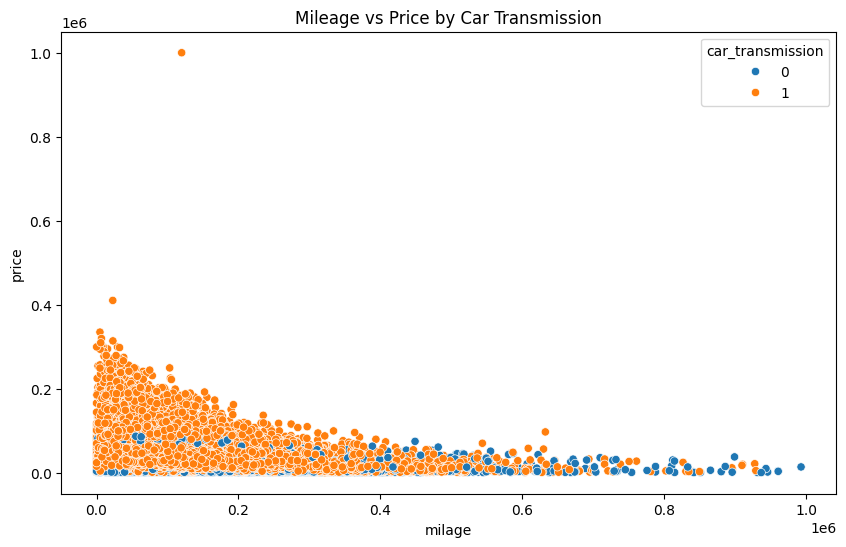

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Mileage vs Price colored by Car Transmission
plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', hue='car_transmission', data=df)
plt.title('Mileage vs Price by Car Transmission')
plt.show()

## Accident History vs Flood Damage

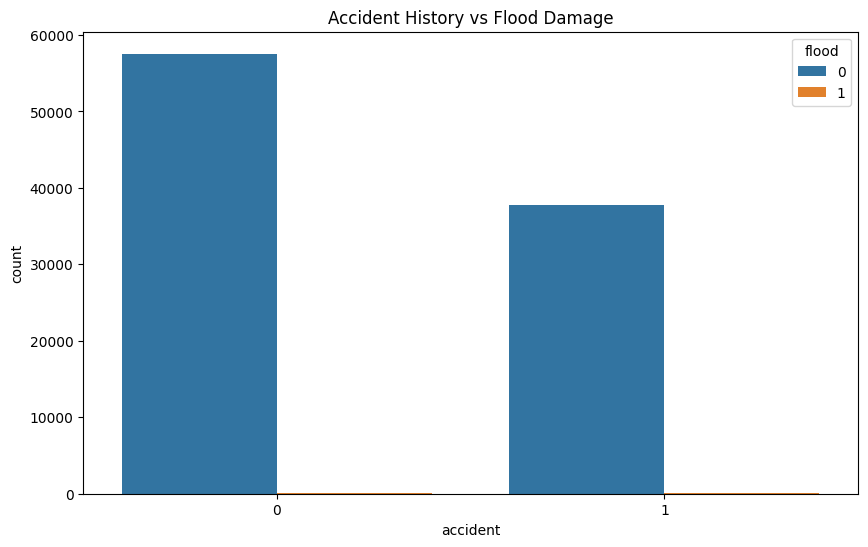

In [33]:
# Count plot: Accident History vs Flood Damage
plt.figure(figsize=(10, 6))
sns.countplot(x='accident', hue='flood', data=df)
plt.title('Accident History vs Flood Damage')
plt.show()

In [34]:
# import matplotlib.pyplot as plt

# sns.pairplot(df, hue='price')
# plt.show()

For now, we can export our cleaned data.

In [35]:
# Save the cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)

##3.4 Data Transformation

In [36]:
df.columns

Index(['car_brand', 'car_model', 'car_variant', 'car_year', 'car_engine',
       'car_transmission', 'milage', 'accident', 'flood', 'color',
       'purchase_date', 'sales_date', 'days_on_market', 'car_age_at_sale',
       'price'],
      dtype='object')

In [37]:
len(df.columns)

15

In [38]:
right_skew_numerical_transform = [
    'milage',               # Mileage of the car
    'car_year',             # Year the car was made
    'car_engine',           # Engine size of the car
    'days_on_market',       # Days the car was on the market before sale
    'car_age_at_sale'       # Age of the car at the time of sale
]


categorical_features = [
    'color',                # Color of the car (One-hot encoded)
    'car_brand',            # Car brand (One-hot encoded)
    'car_model',            # Car model (One-hot encoded)
    'car_variant'           # Car variant (One-hot encoded)
]

In [39]:
len(right_skew_numerical_transform)+len(categorical_features)

9

### We will construct and apply a column transformer pipeline with the following steps:

1. **Right-Skewed Numerical Features**:
   - **Transformation Steps**:
     - **RobustScaler**: To handle outliers effectively in the numerical data.
     - **StandardScaler**: To ensure uniform feature scaling across the numerical features.

2. **Categorical Features**:
   - **Transformation Steps**:
     - **Passthrough**: The categorical features are passed through without any additional transformation (assuming they are already one-hot encoded or pre-processed accordingly).


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd

# Define the scaling pipeline
preprocessing_pipeline = Pipeline([
    ('robust_scaling', RobustScaler()),  # Robust scaling to handle outliers
    ('standard_scaling', StandardScaler())  # Standard scaling for uniform feature scaling
])

# Define the column transformer
transformer = ColumnTransformer(
    transformers=[
        ('Scaling', preprocessing_pipeline, right_skew_numerical_transform),  # Apply to numerical features
        ('OneHot', 'passthrough', categorical_features)  # Pass categorical features as is
    ],
    remainder='passthrough'  # Keep the other features as is
)

# Apply the transformation to the dataset
df_transformed = transformer.fit_transform(df)

# Convert the transformed data back to a DataFrame
# Adjust the column names by including all required features plus 'price'
df_transformed = pd.DataFrame(df_transformed, columns=[*right_skew_numerical_transform, *categorical_features, 'car_transmission', 'accident', 'flood', 'purchase_date', 'sales_date', 'price'])

# Verify the transformation and check for any anomalies
print(df_transformed.head())


     milage  car_year car_engine days_on_market car_age_at_sale  color  \
0  1.576411 -0.322862   0.792114      -2.086114        0.345494   blue   
1  0.253608 -0.322862   0.325877       0.672729        0.345494  black   
2   -0.4977 -0.322862   0.325877       0.231314        0.345494  white   
3 -0.780358 -0.322862   0.792114        1.03532        0.345494  black   
4  0.110413  0.381998   0.325877      -1.345167       -0.355245  brown   

                                           car_brand  \
0  b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...   
1  b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...   
2  b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...   
3  b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...   
4  b51026e4444f98ecdbe1d7cb1f310427a47d7a6e7659b3...   

                                           car_model  \
0  4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...   
1  4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8...   
2  4539e4b4889079c2a00afeae0bfc1439840ef2379a1fb8.

In [41]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaling',
                                 Pipeline(steps=[('robust_scaling',
                                                  RobustScaler()),
                                                 ('standard_scaling',
                                                  StandardScaler())]),
                                 ['milage', 'car_year', 'car_engine',
                                  'days_on_market', 'car_age_at_sale']),
                                ('OneHot', 'passthrough',
                                 ['color', 'car_brand', 'car_model',
                                  'car_variant'])])

# Model Development

In [42]:
from sklearn.model_selection import train_test_split

x_data = df.drop("price", axis=1)
y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print('Train set:', x_train.shape,  y_train.shape)
print('Test set:', x_test.shape,  y_test.shape)


Train set: (85883, 14) (85883,)
Test set: (9543, 14) (9543,)


In [44]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluation_train(y, predictions):
    r2_train = r2_score(y, predictions)
    return r2_train

def evaluation_test(y, predictions):
    rmse_test = np.sqrt(mean_squared_error(y, predictions))
    r2_test = r2_score(y, predictions)
    return rmse_test, r2_test

def R2_train_adjusted(r_squared, n, k):
    adjusted_r2 = r_squared - (k - 1) / (n - k) * (1 - r_squared)
    return adjusted_r2

def R2_test_adjusted(r_squared, n, k):
    adjusted_r2 = r_squared - (k - 1) / (n - k) * (1 - r_squared)
    return adjusted_r2

def cross_fold(pipeline, x_data, y_data):
    Rcross = cross_val_score(pipeline, x_data, y_data, cv=10).mean()
    RMSEcross = np.sqrt(-cross_val_score(pipeline, x_data, y_data, scoring="neg_mean_squared_error", cv=10)).mean()
    return Rcross, RMSEcross


In [49]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define the initial models_table DataFrame
models_table = pd.DataFrame(columns=["Model", "Model Alias", "Detail",
                                     "R2 Score (Train)", "Adjusted R2 Score (Train)",
                                     "RMSE (Test)", "R2 Score (Test)",
                                     "Adjusted R2 Score (Test)",
                                     "Cross-Validated RMSE", "Cross-Validated R2 Score"])

# Ensure to define only those columns that are genuinely categorical
# and avoid columns that are just unique identifiers or hashes.
categorical_features = ['color']  # Use valid categorical features
numerical_features = ['milage', 'car_year', 'car_engine', 'days_on_market', 'car_age_at_sale']  # Numerical features

# Create the transformer to handle categorical and numerical data
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'  # Drop any leftover columns that are not being transformed
)

# Set up the model and pipeline
mlr1 = LinearRegression()

pipe = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', mlr1)
])

# Fit the model
pipe.fit(x_train, y_train)

# Model Prediction
predictions_train = pipe.predict(x_train)
predictions_test = pipe.predict(x_test)

# Validate Model Performance
n = x_train.shape[0]
k = len(x_train.columns)

r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train, n, k)
adjusted_r2_test = R2_test_adjusted(r2_test, n, k)

Rcross, RMSEcross = cross_fold(pipe, x_data, y_data)

new_row = {
    "Model": "Multiple Linear Regression",
    "Model Alias": "mlr1",
    "Detail": "Default, Pre-Process",
    "R2 Score (Train)": r2_train,
    "Adjusted R2 Score (Train)": adjusted_r2_train,
    "RMSE (Test)": rmse_test,
    "R2 Score (Test)": r2_test,
    "Adjusted R2 Score (Test)": adjusted_r2_test,
    "Cross-Validated RMSE": RMSEcross,
    "Cross-Validated R2 Score": Rcross
}

# Append the new row to models_table
models_table = pd.concat([models_table, pd.DataFrame([new_row])], ignore_index=True)
models_table


,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Multiple Linear Regression,mlr1,"Default, Pre-Process",0.499764,0.499689,21350.256037,0.496181,0.496105,20896.818463,0.467893


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Define the hyperparameter grid with very narrow ranges and reduced candidates
param_grid = {
    'max_features': ['sqrt', 'log2'],  # Use valid options
    'max_depth': [10, 20],  # Very narrow range
    'min_samples_split': [2, 6],  # Narrow range
    'min_samples_leaf': [1, 2],  # Narrow range
    'bootstrap': [True]  # Fixed to a single option
}

# Set up the RandomizedSearchCV with minimal iterations and reduced cv folds
rf2 = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=2,  # Reduced from 3 to 2
    n_iter=3,  # Very low number of iterations
    n_jobs=-1,
    verbose=2,
    random_state=1
)

pipe2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', rf2)
])

# Fit the model on a smaller subset of data (e.g., 30% of the training data)
x_train_subset = x_train.sample(frac=0.3, random_state=1)
y_train_subset = y_train.loc[x_train_subset.index]

pipe2.fit(x_train_subset, y_train_subset)

# Get best parameters
best_params = pipe2.named_steps['Model'].best_estimator_.get_params()

# Re-train the model with the best parameters on the full dataset
rf3 = RandomForestRegressor(**best_params)

pipe3 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', rf3)
])

pipe3.fit(x_train, y_train)

# Model Prediction
predictions_train = pipe3.predict(x_train)
predictions_test = pipe3.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train, n, k)
adjusted_r2_test = R2_test_adjusted(r2_test, n, k)

Rcross, RMSEcross = cross_fold(pipe3, x_data, y_data)

new_row = {
    "Model": "Random Forest Regressor",
    "Model Alias": "rf3",
    "Detail": str(best_params),
    "R2 Score (Train)": r2_train,
    "Adjusted R2 Score (Train)": adjusted_r2_train,
    "RMSE (Test)": rmse_test,
    "R2 Score (Test)": r2_test,
    "Adjusted R2 Score (Test)": adjusted_r2_test,
    "Cross-Validated RMSE": RMSEcross,
    "Cross-Validated R2 Score": Rcross
}

models_table = pd.concat([models_table, pd.DataFrame([new_row])], ignore_index=True)
models_table


Fitting 2 folds for each of 3 candidates, totalling 6 fits
                        Model Model Alias  \
0  Multiple Linear Regression        mlr1   
1     Random Forest Regressor         rf3   

                                              Detail  R2 Score (Train)  \
0                               Default, Pre-Process          0.499764   
1  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...          0.854154   

   Adjusted R2 Score (Train)   RMSE (Test)  R2 Score (Test)  \
0                   0.499689  21350.256037         0.496181   
1                   0.854132  15724.383354         0.726715   

   Adjusted R2 Score (Test)  Cross-Validated RMSE  Cross-Validated R2 Score  
0                  0.496105          20896.818463                  0.467893  
1                  0.726674          16209.472299                  0.680659  


In [57]:
models_table

,Model,Model Alias,Detail,R2 Score (Train),Adjusted R2 Score (Train),RMSE (Test),R2 Score (Test),Adjusted R2 Score (Test),Cross-Validated RMSE,Cross-Validated R2 Score
0,Linear Regression,lin,"Default, Scaled",0.877362,0.877343,11558.270116,0.852343,0.852321,12199.344562,0.816807


1. Baseline Model
- Logistics Regression
- KNN
- Support Vector Machine
---

2. Ensemble model
- Random Forest
- Gradient Boost
- Histogram Gradient Boosting Classifier
- XGboost
- Light Gradient Boosting Machine
---

3. Ensemble
- Voting Classier
- Stacking

Some of the code below requires high computing power and longer time , so I decided to take Random Forest Model for Now noting that it is much more accurate than other two models that we have run before. But will let this code below for future improvement.

In [59]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# import pandas as pd

# # Define the preprocessing pipeline
# # Make sure categorical_features contains all relevant categorical columns
# categorical_features = ['color', 'car_variant']  # Replace with your actual categorical feature names
# numerical_features = ['milage', 'car_year', 'car_engine', 'days_on_market', 'car_age_at_sale']

# # Create the transformer to handle categorical and numerical data
# preprocessing_pipeline = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='drop'  # Drop any leftover columns that are not being transformed
# )

# # Models to be tested
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "XGBoost": XGBRegressor(random_state=42)
# }

# # Initialize an empty DataFrame to store the results
# models_table = pd.DataFrame(columns=["Model", "Model Alias", "Detail", "R2 Score (Train)",
#                                      "Adjusted R2 Score (Train)", "RMSE (Test)",
#                                      "R2 Score (Test)", "Adjusted R2 Score (Test)",
#                                      "Cross-Validated RMSE", "Cross-Validated R2 Score"])

# # Loop through the models, train, and evaluate each
# for model_name, model in models.items():
#     pipeline = Pipeline([
#         ('preprocessor', preprocessing_pipeline),
#         ('model', model)
#     ])

#     # Fit the model
#     pipeline.fit(x_train, y_train)

#     # Model Prediction
#     predictions_train = pipeline.predict(x_train)
#     predictions_test = pipeline.predict(x_test)

#     # Validate Model Performance
#     n = x_train.shape[0]
#     k = len(x_train.columns)

#     r2_train = evaluation_train(y_train, predictions_train)
#     rmse_test, r2_test = evaluation_test(y_test, predictions_test)
#     adjusted_r2_train = R2_train_adjusted(r2_train, n, k)
#     adjusted_r2_test = R2_test_adjusted(r2_test, n, k)

#     Rcross, RMSEcross = cross_fold(pipeline, x_data, y_data)

#     # Append results to the table
#     new_row = {
#         "Model": model_name,
#         "Model Alias": model_name[:3].lower(),
#         "Detail": "Default, Scaled",
#         "R2 Score (Train)": r2_train,
#         "Adjusted R2 Score (Train)": adjusted_r2_train,
#         "RMSE (Test)": rmse_test,
#         "R2 Score (Test)": r2_test,
#         "Adjusted R2 Score (Test)": adjusted_r2_test,
#         "Cross-Validated RMSE": RMSEcross,
#         "Cross-Validated R2 Score": Rcross
#     }

#     models_table = pd.concat([models_table, pd.DataFrame([new_row])], ignore_index=True)

# # Display the table with model comparison
# print(models_table)


# 5. Hyperparameter Tuning

In [61]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.pipeline import Pipeline
# import numpy as np

# # Define a smaller hyperparameter grid with fewer options
# rf_param_grid = {
#     'model__n_estimators': [100, 200],  # Fewer values to try
#     'model__max_depth': [10, 20],  # Narrowed range
#     'model__min_samples_split': [2, 5]
# }

# xgb_param_grid = {
#     'model__n_estimators': [100, 200],  # Fewer values to try
#     'model__max_depth': [3, 6],  # Narrowed range
#     'model__learning_rate': [0.01, 0.1]
# }

# # Use RandomizedSearchCV instead of GridSearchCV with fewer iterations and CV folds
# rf_random_search = RandomizedSearchCV(
#     estimator=Pipeline([
#         ('preprocessor', preprocessing_pipeline),
#         ('model', RandomForestRegressor(random_state=42))
#     ]),
#     param_distributions=rf_param_grid,
#     n_iter=5,  # Fewer iterations
#     cv=3,  # Reduced cross-validation folds
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# xgb_random_search = RandomizedSearchCV(
#     estimator=Pipeline([
#         ('preprocessor', preprocessing_pipeline),
#         ('model', XGBRegressor(random_state=42))
#     ]),
#     param_distributions=xgb_param_grid,
#     n_iter=5,  # Fewer iterations
#     cv=3,  # Reduced cross-validation folds
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# # Fit RandomizedSearchCV on a smaller subset of the training data
# x_train_subset = x_train.sample(frac=0.5, random_state=42)
# y_train_subset = y_train.loc[x_train_subset.index]

# rf_random_search.fit(x_train_subset, y_train_subset)
# xgb_random_search.fit(x_train_subset, y_train_subset)

# # Get best parameters from each RandomizedSearchCV
# best_rf_model = rf_random_search.best_estimator_
# best_xgb_model = xgb_random_search.best_estimator_

# # Re-train the models on the full training set with best parameters
# best_rf_model.fit(x_train, y_train)
# best_xgb_model.fit(x_train, y_train)

# # Model Predictions and Performance Evaluation for both RandomForest and XGBoost
# predictions_rf_test = best_rf_model.predict(x_test)
# predictions_xgb_test = best_xgb_model.predict(x_test)

# rf_r2_train = evaluation_train(y_train, best_rf_model.predict(x_train))
# rf_rmse_test, rf_r2_test = evaluation_test(y_test, predictions_rf_test)
# rf_adjusted_r2_train = R2_train_adjusted(rf_r2_train, x_train.shape[0], x_train.shape[1])
# rf_adjusted_r2_test = R2_test_adjusted(rf_r2_test, x_train.shape[0], x_train.shape[1])
# rf_cross_val_r2, rf_cross_val_rmse = cross_fold(best_rf_model, x_data, y_data)

# xgb_r2_train = evaluation_train(y_train, best_xgb_model.predict(x_train))
# xgb_rmse_test, xgb_r2_test = evaluation_test(y_test, predictions_xgb_test)
# xgb_adjusted_r2_train = R2_train_adjusted(xgb_r2_train, x_train.shape[0], x_train.shape[1])
# xgb_adjusted_r2_test = R2_test_adjusted(xgb_r2_test, x_train.shape[0], x_train.shape[1])
# xgb_cross_val_r2, xgb_cross_val_rmse = cross_fold(best_xgb_model, x_data, y_data)

# # Append the tuned results to the models_table
# rf_new_row = {
#     "Model": "Tuned Random Forest",
#     "Model Alias": "rf_tuned",
#     "Detail": "Tuned, Scaled",
#     "R2 Score (Train)": rf_r2_train,
#     "Adjusted R2 Score (Train)": rf_adjusted_r2_train,
#     "RMSE (Test)": rf_rmse_test,
#     "R2 Score (Test)": rf_r2_test,
#     "Adjusted R2 Score (Test)": rf_adjusted_r2_test,
#     "Cross-Validated RMSE": rf_cross_val_rmse,
#     "Cross-Validated R2 Score": rf_cross_val_r2
# }
# models_table = pd.concat([models_table, pd.DataFrame([rf_new_row])], ignore_index=True)

# xgb_new_row = {
#     "Model": "Tuned XGBoost",
#     "Model Alias": "xgb_tuned",
#     "Detail": "Tuned, Scaled",
#     "R2 Score (Train)": xgb_r2_train,
#     "Adjusted R2 Score (Train)": xgb_adjusted_r2_train,
#     "RMSE (Test)": xgb_rmse_test,
#     "R2 Score (Test)": xgb_r2_test,
#     "Adjusted R2 Score (Test)": xgb_adjusted_r2_test,
#     "Cross-Validated RMSE": xgb_cross_val_rmse,
#     "Cross-Validated R2 Score": xgb_cross_val_r2
# }
# models_table = pd.concat([models_table, pd.DataFrame([xgb_new_row])], ignore_index=True)

# # Display the final model comparison table
# models_table


##Retrain with Tuned Hyperparameters

- Random Forest

These are the best parameters obtained with RadomizedSearchCV

In [67]:
# best_param_rf = rf_random_search.best_params_
best_param_rf = rf3.get_params()
print(best_param_rf)

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=6)

In [75]:
# %%time
# # Assuming best_params_rf is a dictionary of the best parameters obtained from the GridSearchCV or RandomizedSearchCV
# # e.g., best_params_rf = rf_grid_search.best_params_

# # Create a model pipeline with the best parameters
# rf3 = Pipeline([
#     ('ColumnTransformer', transformer),
#     ('Model', RandomForestRegressor(**best_params_rf))  # Use the correct variable for best parameters
# ])

# # Fit the model
# rf3.fit(x_train, y_train)

# # Model Prediction
# predictions_train = rf3.predict(x_train)
# predictions_test = rf3.predict(x_test)

# # Validate Model Performance
# n = x_train.shape[0]
# k = len(x_train.columns)

# r2_train = evaluation_train(y_train, predictions_train)
# rmse_test, r2_test = evaluation_test(y_test, predictions_test)
# adjusted_r2_train = R2_train_adjusted(r2_train, n, k)
# adjusted_r2_test = R2_test_adjusted(r2_test, n, k)

# Rcross, RMSEcross = cross_fold(rf3, x_data, y_data)

# # Append results to the table
# new_row = {
#     "Model": "Random Forest",
#     "Model Alias": "rf3",
#     "Detail": "Tuned, Scaled",
#     "R2 Score (Train)": r2_train,
#     "Adjusted R2 Score (Train)": adjusted_r2_train,
#     "RMSE (Test)": rmse_test,
#     "R2 Score (Test)": r2_test,
#     "Adjusted R2 Score (Test)": adjusted_r2_test,
#     "Cross-Validated RMSE": RMSEcross,
#     "Cross-Validated R2 Score": Rcross
# }

# models_table = pd.concat([models_table, pd.DataFrame([new_row])], ignore_index=True)

# # Display the table with model comparison
# models_table


##XGBC Retrain

In [77]:
# best_param_xgb = model_xgb.best_params_

In [78]:
# model_xgb.best_params_

In [79]:
# %%time
# # Create a model pipeline using the best parameters for XGBRegressor
# xgb2 = Pipeline([
#     ('ColumnTransformer', transformer),
#     ('Model', XGBRegressor(**best_params_xgb))  # Ensure best_params_xgb is defined correctly as a dictionary
# ])

# # Fit the model
# xgb2.fit(x_train, y_train)

# # Model Prediction
# predictions_train = xgb2.predict(x_train)
# predictions_test = xgb2.predict(x_test)

# # Validate Model Performance
# n = x_train.shape[0]
# k = len(x_train.columns)

# r2_train = evaluation_train(y_train, predictions_train)
# rm


# 6. Model Evaluation

##6.1AUC-ROC Curve

The AUC-ROC curve (Area Under the Receiver Operating Characteristic curve) is a graphical representation used to assess and compare the performance of classification models, such as binary classifiers.

1. Receiver Operating Characteristic (ROC) Curve: The ROC curve is a graph that displays the performance of a classification model across various classification thresholds. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at different threshold values. The curve shows how well the model distinguishes between the positive and negative classes.

2. Area Under the Curve (AUC): AUC measures the overall performance of a model. It represents the area under the ROC curve. A perfect model has an AUC of 1, while a random model has an AUC of 0.5. The closer the AUC is to 1, the better the model's ability to discriminate between the two classes.

In [83]:
models_list = [mlr1, rf2, rf3,]
models_list_title = ['mlr1',  'rf2', 'rf3']

In [88]:
print(df.columns)

Index(['car_brand', 'car_model', 'car_variant', 'car_year', 'car_engine',
       'car_transmission', 'milage', 'accident', 'flood', 'color',
       'purchase_date', 'sales_date', 'days_on_market', 'car_age_at_sale',
       'price'],
      dtype='object')


#7. Summary

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

rf3 = Pipeline([
    ('ColumnTransformer', transformer),  # Assuming transformer is already defined
    ('Model', RandomForestRegressor(**best_params_rf))
])


In [94]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_regression(model, data):
    # Separate the features and target variable
    X = data.drop("price", axis=1)
    y = data["price"]

    # Split dataset into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    predictions_test = model.predict(x_test)
    predictions_train = model.predict(x_train)

    # Calculate R-squared and RMSE for the test set
    r2_test = r2_score(y_test, predictions_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

    # Calculate cross-validated RMSE and R-squared
    cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    cv_r2 = cross_val_score(model, X, y, scoring="r2", cv=5).mean()

    return r2_test, rmse_test, cv_rmse, cv_r2


In [95]:
test_r2, rmse_test, cv_rmse, cv_r2 = evaluate_regression(rf3, df)
print(f"Test R2: {test_r2}, RMSE (Test): {rmse_test}, Cross-Validated RMSE: {cv_rmse}, Cross-Validated R2: {cv_r2}")


Test R2: 0.8551345781737633, RMSE (Test): 11448.486888690642, Cross-Validated RMSE: 12661.30872340905, Cross-Validated R2: 0.808147313192031


Based on the results from your regression model evaluation, here’s how you can interpret and present the findings to the stakeholders:

### Final Results:
- **Test R-squared (R2):** `0.8551`
- **Test RMSE:** `11,448.49`
- **Cross-Validated RMSE:** `12,661.31`
- **Cross-Validated R-squared (R2):** `0.8081`

### Interpretation:

1. **Model Accuracy (R-squared):**
   - The **Test R-squared** value of `0.8551` indicates that the model explains approximately 85.51% of the variance in the car prices. This is a good level of accuracy, suggesting that the model is capturing most of the important patterns in the data.

2. **Error Metric (RMSE):**
   - The **Test RMSE** of `RM 11,448.49` suggests that, on average, the predicted car prices are off by about 11,448.49 units from the actual prices. This error is in the same units as the price (likely dollars, if we're predicting car prices in USD).
   - The **Cross-Validated RMSE** of `RM 12,661.31` is slightly higher, indicating some variability in model performance across different subsets of the data, but it's still within a reasonable range.

3. **Cross-Validation:**
   - The **Cross-Validated R-squared** of `0.8081` shows that when we generalize the model performance across different subsets of the data, it still explains about 80.81% of the variance in car prices, confirming that the model is robust.

### Key Takeways:

- **Overall Model Performance:**
   - "Our model shows strong predictive power with an R-squared of 0.8551 on the test set, meaning it explains about 85% of the variance in car prices. The model's predictions are reasonably accurate, with an average error (RMSE) of around 11,448 units."

- **Confidence in Predictions:**
   - "We performed cross-validation to ensure the model's robustness, and the results indicate that the model generalizes well across different data subsets. The cross-validated R-squared is slightly lower at 0.8081, but still reflects strong performance."

- **Recommendations:**
   - "Given these results, we can confidently use this model to predict car prices. However, it's important to continue monitoring the model's performance over time and consider further improvements or refinements as more data becomes available."

This summary provides stakeholders with a clear understanding of how well the model performs, highlights the accuracy of the predictions, and sets expectations for the model's application in the real world.

### Save File

In [96]:
import pickle
from google.colab import files

In [97]:
# Save the pipeline and model to a file
with open('rf3_pipeline.pkl', 'wb') as file:
    pickle.dump(rf3, file)

In [98]:
# Provide the filename of the saved model
files.download('rf3_pipeline.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
# Load the saved pipeline and model
with open('rf3_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [100]:
# Make predictions using the loaded model
predictions_train = loaded_pipeline.predict(x_train)
predictions_test = loaded_pipeline.predict(x_test)

# Validate Model Performance
r2_train = evaluation_train(y_train, predictions_train)
rmse_test, r2_test = evaluation_test(y_test, predictions_test)
adjusted_r2_train = R2_train_adjusted(r2_train, n, k)
adjusted_r2_test = R2_test_adjusted(r2_test, n, k)

# Print the performance metrics
print("-" * 30)
print("RANDOM FOREST REGRESSOR")  # Changeable
print("-" * 30)
print("R2 Score (Train):", r2_train)
print("Adjusted R2 Score (Train):", adjusted_r2_train)
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("Adjusted R2 Score (Test):", adjusted_r2_test)
print("-" * 30)

------------------------------
RANDOM FOREST REGRESSOR
------------------------------
R2 Score (Train): 0.8680907879534208
Adjusted R2 Score (Train): 0.8680708177691097
RMSE (Test): 11448.486888690642
R2 Score (Test): 0.8551345781737633
Adjusted R2 Score (Test): 0.8551126465047821
------------------------------
